In [1]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('bbc-text.csv')

Using TensorFlow backend.


In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 2225):
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from gensim.models import Word2Vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)    
model = Word2Vec(corpus, size=100, window=10, min_count=3, workers=4, sg=1)

In [4]:

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)
word_index = tokenizer_obj.word_index
status_pad = pad_sequences(sequences, maxlen=200)

In [5]:
EMBEDDING_DIM =100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word in model.wv.vocab.keys():
    i=word_index[word]
    embedding_matrix[i] = model.wv[word]

In [6]:
y=[]
for word in dataset.iloc[:,0].values:
    if word=='business' :
        y.append([1 ,0 ,0 ,0 ,0 ])
    if word=='entertainment' :
        y.append([0 ,1 ,0 ,0 ,0 ])
    if word=='politics' :
        y.append([0 ,0 ,1 ,0 ,0 ])
    if word=='sport' :
        y.append([0 ,0 ,0 ,1 ,0 ])
    if word=='tech' :
        y.append([0 ,0 ,0 ,0 ,1 ])
y = np.asarray(y)    

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(status_pad, y, test_size = 0.20, random_state = 0)


In [8]:
model1 = Sequential()
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=200,
                            trainable=True)

model1.add(embedding_layer)
model1.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(10, input_dim=1, activation='relu'))
model1.add(Dense(5, activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
history=model1.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=20,batch_size=64,verbose=2)
print(model1.summary())


W0927 15:31:55.787189  4812 deprecation_wrapper.py:119] From C:\Users\kiki\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0927 15:31:55.818416  4812 deprecation_wrapper.py:119] From C:\Users\kiki\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0927 15:31:55.818416  4812 deprecation_wrapper.py:119] From C:\Users\kiki\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0927 15:31:55.834041  4812 deprecation_wrapper.py:119] From C:\Users\kiki\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0927 15:31:55.834041  4812 deprecation_wrapper.py:119] From

Train on 1780 samples, validate on 445 samples
Epoch 1/20
 - 4s - loss: 1.0217 - acc: 0.5899 - val_loss: 0.4270 - val_acc: 0.9169
Epoch 2/20
 - 4s - loss: 0.3240 - acc: 0.9079 - val_loss: 0.1733 - val_acc: 0.9618
Epoch 3/20
 - 4s - loss: 0.1762 - acc: 0.9455 - val_loss: 0.1794 - val_acc: 0.9371
Epoch 4/20
 - 4s - loss: 0.1036 - acc: 0.9719 - val_loss: 0.1057 - val_acc: 0.9708
Epoch 5/20
 - 3s - loss: 0.0656 - acc: 0.9787 - val_loss: 0.0819 - val_acc: 0.9775
Epoch 6/20
 - 3s - loss: 0.0366 - acc: 0.9882 - val_loss: 0.0735 - val_acc: 0.9775
Epoch 7/20
 - 3s - loss: 0.0122 - acc: 0.9983 - val_loss: 0.1972 - val_acc: 0.9461
Epoch 8/20
 - 3s - loss: 0.0179 - acc: 0.9927 - val_loss: 0.0692 - val_acc: 0.9798
Epoch 9/20
 - 3s - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0931 - val_acc: 0.9708
Epoch 10/20
 - 3s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0751 - val_acc: 0.9775
Epoch 11/20
 - 4s - loss: 4.6688e-04 - acc: 1.0000 - val_loss: 0.0719 - val_acc: 0.9820
Epoch 12/20
 - 4s - loss: 0.0226 -

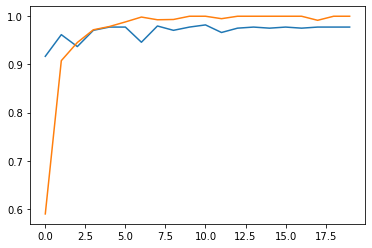

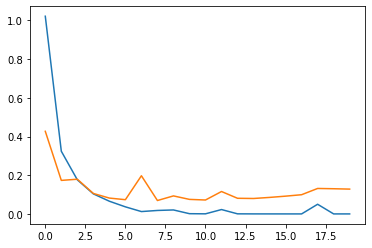

In [9]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()